In [97]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [98]:
exp_root = "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/diagnosis"

df_results = pd.read_csv(os.path.join(exp_root, "exp_status.csv"))

df_results

,dataset,model,strategy,pred_file,rel_path,n,auroc,ci_low,ci_high,auc_std,status
0,Camelyon17,BLIP2-2.7b,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/eval_seed0/original_pret...,920,0.517358,0.479656,0.555933,0.019424,OK
1,Camelyon17,BLIP2-2.7b,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_img-lora-lp_seed42,920,0.982491,0.975661,0.988340,0.003237,OK
2,Camelyon17,BLIP2-2.7b,train_lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_lp_seed42,920,0.981262,0.974411,0.987425,0.003409,OK
3,Camelyon17,BioMedCLIP,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/eval_seed0/original_pret...,920,0.771692,0.741732,0.802931,0.015638,OK
4,Camelyon17,BioMedCLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/train_img-lora-lp_seed42,920,0.986990,0.981275,0.992037,0.002773,OK
...,...,...,...,...,...,...,...,...,...,...,...
139,PAPILA,PubMedCLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_img-lora-lp_seed42,56,0.794326,0.658853,0.915159,0.066019,OK
140,PAPILA,PubMedCLIP,train_lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_lp_seed42,56,0.517730,0.307061,0.734405,0.107715,OK
141,PAPILA,SigLIP,eval_seed0/original_pretrained,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/eval_seed0/original_pretrained,56,0.517730,0.327592,0.734383,0.104283,OK
142,PAPILA,SigLIP,train_img-lora-lp_seed42,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/train_img-lora-lp_seed42,56,0.713948,0.533528,0.876771,0.086208,OK


In [99]:
df_results["strategy"] = df_results["strategy"].replace(
    "train_img-lora-lp_seed42", "FT-LoRA")
df_results["strategy"] = df_results["strategy"].replace(
    "train_lp_seed42", "FT-LP")
df_results["strategy"] = df_results["strategy"].replace(
    "eval_seed0/original_pretrained", "ZS")
df_results["auc"] = df_results["auroc"]

df_results

,dataset,model,strategy,pred_file,rel_path,n,auroc,ci_low,ci_high,auc_std,status,auc
0,Camelyon17,BLIP2-2.7b,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/eval_seed0/original_pret...,920,0.517358,0.479656,0.555933,0.019424,OK,0.517358
1,Camelyon17,BLIP2-2.7b,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_img-lora-lp_seed42,920,0.982491,0.975661,0.988340,0.003237,OK,0.982491
2,Camelyon17,BLIP2-2.7b,FT-LP,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BLIP2-2.7b/train_lp_seed42,920,0.981262,0.974411,0.987425,0.003409,OK,0.981262
3,Camelyon17,BioMedCLIP,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/eval_seed0/original_pret...,920,0.771692,0.741732,0.802931,0.015638,OK,0.771692
4,Camelyon17,BioMedCLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,Camelyon17/BioMedCLIP/train_img-lora-lp_seed42,920,0.986990,0.981275,0.992037,0.002773,OK,0.986990
...,...,...,...,...,...,...,...,...,...,...,...,...
139,PAPILA,PubMedCLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_img-lora-lp_seed42,56,0.794326,0.658853,0.915159,0.066019,OK,0.794326
140,PAPILA,PubMedCLIP,FT-LP,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/PubMedCLIP/train_lp_seed42,56,0.517730,0.307061,0.734405,0.107715,OK,0.517730
141,PAPILA,SigLIP,ZS,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/eval_seed0/original_pretrained,56,0.517730,0.327592,0.734383,0.104283,OK,0.517730
142,PAPILA,SigLIP,FT-LoRA,/project/6101776/nanboy/MedVLMBench/log/diagno...,PAPILA/SigLIP/train_img-lora-lp_seed42,56,0.713948,0.533528,0.876771,0.086208,OK,0.713948


In [100]:
ID_dict = {
    "MedCLIP": ["CheXpert"],
    "PubMedCLIP": ["CheXpert"],
    "BioMedCLIP": ["CheXpert", "HAM10000", "Camelyon17"],
    "PLIP": ["Camelyon17"],
    "MedSigLIP": ["CheXpert", "Camelyon17", "PAPILA", "HAM10000", "PAPILA"],
}
general_models = ["CLIP", "BLIP2-2.7b", "SigLIP"]

model_familis = []
model_types = []
is_ood = []

for dataset, model in zip(df_results["dataset"].tolist(), df_results["model"].tolist()):
    if not model in ID_dict.keys():
        is_ood.append(1)
    elif dataset not in ID_dict[model]:
        is_ood.append(1)
    else:
        is_ood.append(0)

    if model in general_models:
        model_types.append("general")
    else:
        model_types.append("medical")

    if "SigLIP" in model:
        model_familis.append("SigLIP")
    else:
        model_familis.append("CLIP")


df_results["is_ood"] = is_ood
df_results["model_family"] = model_familis
df_results["model_type"] = model_types

In [101]:
data_order = ["CheXpert", "Camelyon17", "HAM10000",
              "PAPILA", "GF3300", "HarvardFairVLMed10k"]

model_order = [
    "CLIP",
    "BLIP2-2.7b",
    "SigLIP",
]

In [102]:
def format_boot_df(df_index):
    df_index = df_index.reset_index(drop=True)

    dfs = []
    for i in range(len(df_index)):
        item = df_index.iloc[i]

        df_boot_i = pd.read_csv(os.path.join(exp_root, item["rel_path"], "bootstrap_result.csv"))[:1000]
        df_boot_i = df_boot_i * 100
        df_boot_i["model"] = item["model"]
        df_boot_i["dataset"] = item["dataset"]
        df_boot_i["model_type"] = item["model_type"]
        df_boot_i["strategy"] = item["strategy"]
        dfs.append(df_boot_i)

    return pd.concat(dfs).reset_index(drop=True)


def try_fetch(list, index):
    try:
        return list[index]
    except:
        return None


def get_med_stats(df, metric):
    assert len(df["dataset"].unique()) == 1
    dataset = df["dataset"].unique()[0]

    df_med = df.loc[df["model_type"] == "medical"]
    df_zs = df_med.loc[(df_med["strategy"] == "ZS") & (df_med["is_ood"] == 0)]
    df_sft = df_med.loc[(df_med["strategy"] == "FT-LP") & (df_med["is_ood"] == 1)]

    zs_metric = (
        np.sort(
            np.array(df_zs[metric]),
        )
        * 100
    )
    sft_metric = (
        np.sort(
            np.array(df_sft[metric]),
        )
        * 100
    )
    best_zs, second_zs = try_fetch(zs_metric, -1), try_fetch(zs_metric, -2)
    best_sft, second_sft = try_fetch(sft_metric, -1), try_fetch(sft_metric, -2)

    return (best_zs, second_zs), (best_sft, second_sft)


def update_min(current_min, value):
    return min(current_min, value)


def update_max(current_max, value):
    return max(current_max, value)

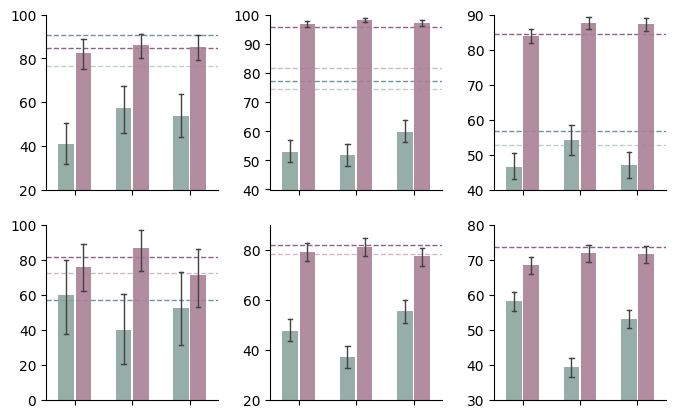

In [108]:
metric = "auc"

fig, axes = plt.subplots(2, 3, figsize=(8, 5))

for i_plot, dataset in enumerate(data_order):
    i_row, i_col = i_plot // 3, i_plot % 3
    ax = axes[i_row, i_col]
    df_dataset = df_results.loc[(df_results["dataset"] == dataset)]

    df_plot = format_boot_df(df_dataset.loc[df_dataset["model_type"] == "general"])

    df_plot["model"] = pd.Categorical(df_plot["model"], categories=model_order, ordered=True)
    df_plot = df_plot.sort_values(by="model")

    min_value, max_value = df_plot[metric].min(), df_plot[metric].max()

    (best_med_zs, second_med_zs), (best_med_sft, second_med_sft) = get_med_stats(df_dataset, metric)

    if best_med_zs is not None:
        min_value = update_min(min_value, best_med_zs)
        max_value = update_max(max_value, best_med_zs)
        ax.axhline(y=best_med_zs, color="#5c898e", ls="--", lw=1, zorder=1, alpha=0.9)
    if second_med_zs is not None:
        min_value = update_min(min_value, second_med_zs)
        max_value = update_max(max_value, second_med_zs)
        ax.axhline(y=second_med_zs, color="#5c898e", ls="--", lw=1, zorder=1, alpha=0.4)
    if best_med_sft is not None:
        min_value = update_min(min_value, best_med_sft)
        max_value = update_max(max_value, best_med_sft)
        ax.axhline(y=best_med_sft, color="#80517a", ls="--", lw=1, zorder=1, alpha=0.9)
    if second_med_sft is not None:
        if abs(best_med_sft - second_med_sft) > 3:
            min_value = update_min(min_value, second_med_sft)
            max_value = update_max(max_value, second_med_sft)
            ax.axhline(y=second_med_sft, color="#80517a", ls="--", lw=1, zorder=1, alpha=0.4)

    min_ylim, max_ylim = int(min_value / 10) * 10, (int(max_value / 10) + 1) * 10
    max_ylim = min(100, max_ylim)

    sns.barplot(
        data=df_plot,
        x="model",
        y=metric,
        hue="strategy",
        ax=ax,
        legend=False,
        errorbar=("pi", 95),
        err_kws={"linewidth": 1},
        n_boot=1000,
        capsize=0.15,
        width=0.6,
        gap=0.1,
        palette=[
            "#86aaa0",
            "#b17a96",
        ],
        hue_order=["ZS", "FT-LP"],
        alpha=0.9,
    )
    # sns.boxplot(data=df_plot, x="model", y=metric, hue="trainable_module", ax=ax, legend=False)
    ax.set_ylim([min_ylim, max_ylim])
    # ax.set_ylim([30, 90])
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.spines["top"].set_visible(False)
    # ax2.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.subplots_adjust(wspace=0.3)

plt.savefig(
    "heatmap/diagnosis_bar_rqgap.png",
    dpi=1000,
    bbox_inches="tight",
)

In [107]:
df_test = (
    pd.read_csv(
        "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/merged/vqa/VQA-RAD/Qwen25-VL/eval_seed0/qwen2_5vl-7b-lora-ML-merged/bootstrap_result.csv"
    )
    * 100
)
df_test["gpt_score_overall"].quantile(0.95)

np.float64(74.38192904656319)

In [65]:
min_ylim

40

In [43]:
axes[i_plot]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [44]:
i_plot

0